# 02-Problem 5.3

For this project I have done problem 5.3. This exercise takes the lessons from chapter 5 and applies them to a sine functios instead of a logistic map.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Comparing Sine Function to Logistic Map

Here the sine function and the logistic map are graphed. Both begin at zero and are graphed to 1 with 100 x points.  They appear to be the same.

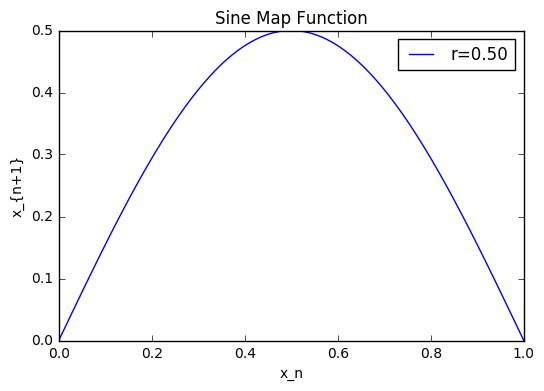

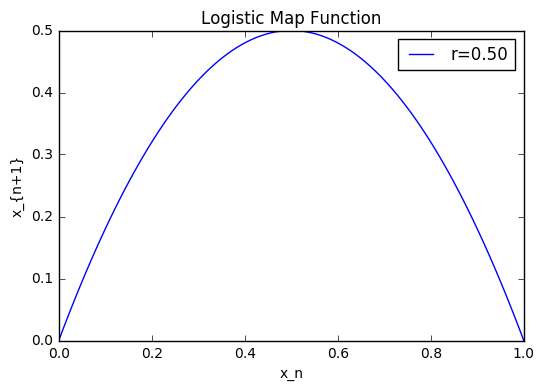

In [3]:
r = 0.5
xn = np.linspace(0,1,100)
xmap = r*np.sin(np.pi*xn)

plt.figure()
plt.title("Sine Map Function")
plt.plot(xn,xmap,"b-", label="r=%.2f" % r)
plt.xlabel("x_n")
plt.ylabel("x_{n+1}")
plt.legend(loc="upper right")
plt.show()

r = 0.5
xn = np.linspace(0,1,100)
xmap = 4*r*xn*(1-xn)

plt.figure()
plt.title("Logistic Map Function")
plt.plot(xn,xmap,"b-", label="r=%.2f" % r)
plt.xlabel("x_n")
plt.ylabel("x_{n+1}")
plt.legend(loc="upper right")
plt.show()

## Fixed Points

The graphs below are used to find the last points on the graph which are the fixed points for the period.  The  are also used for finding the r values, or bifurcation points, for the bifurcation graph in the next step. 

In [4]:
def map_func(xn=0, r=0):
    #input: x_n  value of x at the nth iteration
    #        r   logistic constant
    #output: x_n+1  next value of x
    
    x_npo = r*np.sin(np.pi*xn) #map function
    
    return x_npo

In [8]:
def graph(x0,r,N,gs):
    #N = 20 #total number of iterations
    #x_0 = 0.5 #initial value of x
    #r = 0.2
    xn_all = [] #list to store all values of x_n
    xn_all.append(x0) #append initial value
    n_all = []
    n_all.append(0)

    n = 0 #loop variable
    while n < N:
        xn = xn_all[n]
        x_nplusone = map_func(xn, r) #calculate x_n+1
        xn_all.append(x_nplusone)
        n_all.append(n+1)
    
        n = n + 1

    print("Fixed Point: ", xn_all[-1])    
    
    plt.figure()
    plt.title("Trajectory of x_n")
    plt.plot(n_all,xn_all, gs, label="x0 = %.2f, r = %.2f" % (x0, r))
    plt.ylim(0,1)
    plt.xlabel("n")
    plt.ylabel("x_{n+1}")
    plt.legend(loc="upper right")
    plt.show()

Fixed Point:  0.632826238433


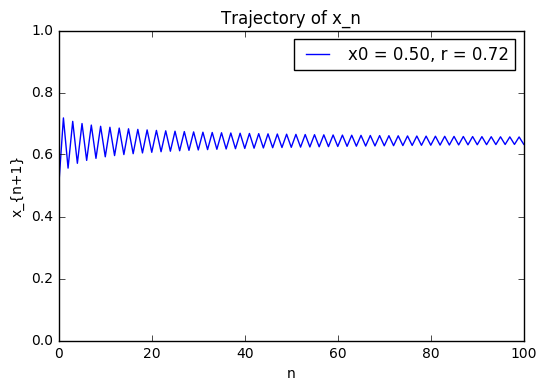

In [9]:
graph(0.5,0.718,100, 'b-')

Fixed Point:  0.454211560476


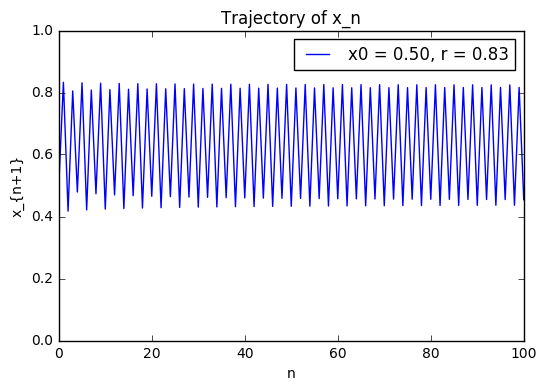

In [10]:
graph(0.5,0.833,100, 'b-')

Fixed Point:  0.530021575859


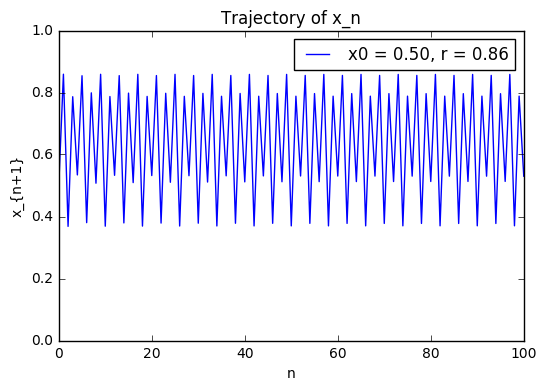

In [11]:
graph(0.5,0.859,100, 'b-')

Fixed Point:  0.557551482146


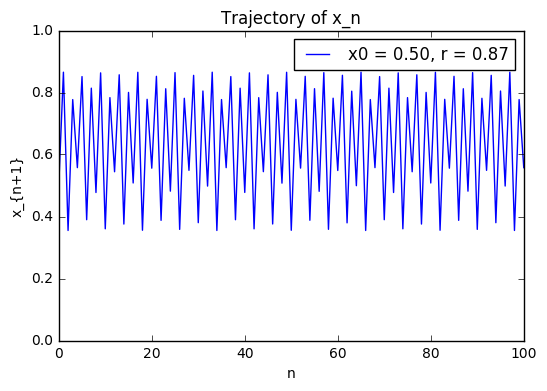

In [12]:
graph(0.5,0.8655,100, 'b-')

## Bifurcation Diagram

A bifurcation diagram shows the points at which the period doubles.  The lines on the graph represent the r values at which the period doubles, with the fourth line being when the function becomes chaotic.  

In [22]:
def trajectory(x_0=0, r=0, N=30):
    xn_all = [] #list to store all values of x_n
    xn_all.append(x_0) #append initial value
    n_all = []
    n_all.append(0)

    n = 0 #loop variable
    while n < N:
        xn = xn_all[n]
        x_nplusone = map_func(xn, r) #calculate x_n+1
        xn_all.append(x_nplusone)
        n_all.append(n+1)

        n = n + 1
    
    return xn_all

In [23]:
def traj_end(x0=0, r=0, Ntotal=1000, Nlast=100):
    xn_end = [] #list to store all values of x_n after n=Ntotal-Nlast
    xn = x0
    n = 0 #loop variable
    while n < Ntotal:
        x_npo = map_func(xn, r) #calculate x_n+1
        if n > Ntotal-Nlast-1:
            xn_end.append(x_npo)
        xn = x_npo
        n = n + 1

    return xn_end

In [24]:
def plot_bifurcation(x0=0.5, Ntotal = 1000, Nend = 100, rmin = 0.7, rmax = 1, ymin = 0,ymax = 1, plotattractors=True):

    xoffset = 0.02 #offset for text on plot
    
    plt.figure()
    plt.title("x_n after the initial transient")

    for r in np.linspace(rmin,rmax,1000):
        xn=traj_end(x0,r,Ntotal,Nend)
        rh = r*np.ones(Nend)
        plt.plot(rh,xn,"b,")

    if(plotattractors):
       for i in range(0,len(attractors)):
            print("r_%d: %.3f" % (i+1,attractors[i]))
            plt.axvline(x=attractors[i])
            if(i<3):
                plt.text(attractors[i]-xoffset, xoffset, "r_%d" % (i+1))
            else:
                plt.text(attractors[i]+0.5*xoffset, xoffset, "r_%d" % (i+1))                
    plt.xlabel("r")
    plt.ylabel("x_n")
    plt.ylim(ymin, ymax)
    plt.show()

In [25]:
attractors=[0.718, 0.833, 0.859, 0.8655]
for i in range(0,len(attractors)):
    print("r_%d: %.3f" % (i+1,attractors[i]))

r_1: 0.718
r_2: 0.833
r_3: 0.859
r_4: 0.866


r_1: 0.718
r_2: 0.833
r_3: 0.859
r_4: 0.866


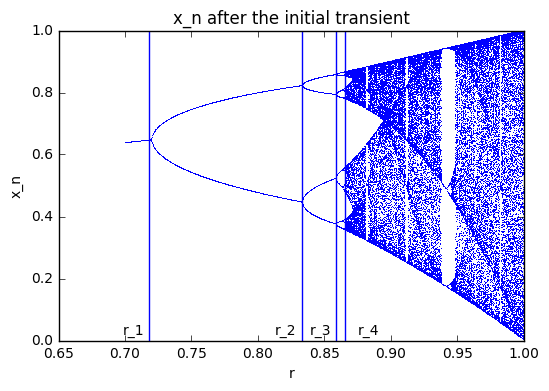

In [26]:
plot_bifurcation()

## Feigenbaum Number

Here we solve for the Feigenbaum Number.

$$delta = (r_n-r_n-1)/(r_n+1-r_n)$$

The Feigenbaum Number is the ratio of adjacent distances in successive bifurcations. 

In [10]:
gamn = 0.833
gamn_1 = 0.718
gamn_2 = 0.859

delta = (gamn-gamn_1)/(gamn_2-gamn)
print("Feigenbaum Delta Number = ", delta)

Feigenbaum Delta Number =  4.423076923076919


## Lyapunov Exponent

Here we find the Lyapunov exponent.  This number is the average rate of exponential convergence or divergence of nearby trajectories.  We can use the Lyapunov exponent to measure the chaoticity of a system.

If the number is greater than zero then the system is chaotic, less than zero then the system is nonchaotic, and equal to zero then it is indeterminate.

In [11]:
def exponentialfunc(x,A,lamb):
    return A*np.exp(x*lamb)

In [12]:
def linearfunc(x,m,b):
    return m*x+b

In [13]:
def trajectory(x_0=0, r=0, N=30):
    xn_all = [] #list to store all values of x_n
    xn_all.append(x_0) #append initial value
    n_all = []
    n_all.append(0)

    n = 0 #loop variable
    while n < N:
        xn = xn_all[n]
        x_nplusone = map_func(xn, r) #calculate x_n+1
        xn_all.append(x_nplusone)
        n_all.append(n+1)

        n = n + 1
    
    return xn_all

[ -6.12722059e-06   1.25121713e-04]


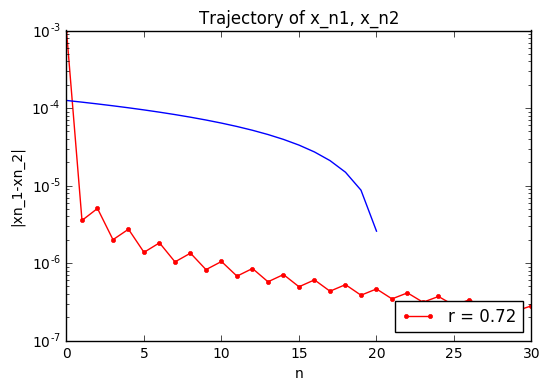

In [28]:
x0_1=0.5
x0_2=x0_1+0.001
r=0.718
N=30

xn_1=np.array(trajectory(x0_1, r, N))
xn_2=np.array(trajectory(x0_2, r, N))
dx = np.abs(xn_2-xn_1)
n=np.linspace(0,N,N+1)

parameters, stats = curve_fit(linearfunc, n, dx)
print(parameters)

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.semilogy(n,linearfunc(n,*parameters))
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

[ -2.64154291e-06   1.27745642e-04]


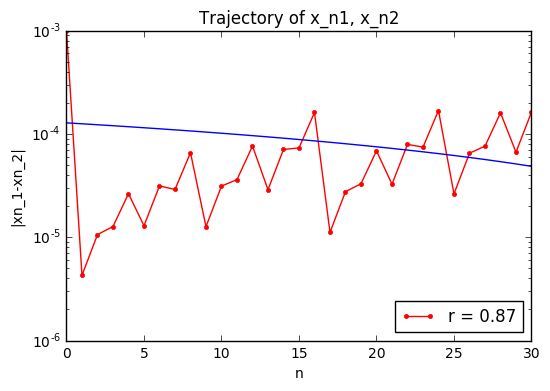

In [27]:
x0_1=0.5
x0_2=x0_1+0.001
r=0.8655
N=30

xn_1=np.array(trajectory(x0_1, r, N))
xn_2=np.array(trajectory(x0_2, r, N))
dx = np.abs(xn_2-xn_1)
n=np.linspace(0,N,N+1)

parameters, stats = curve_fit(linearfunc, n, dx)
print(parameters)

plt.figure()
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.semilogy(n,linearfunc(n,*parameters))
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()